<a href="https://colab.research.google.com/github/7sr7/Projs-in-AI-HW-3-rev-/blob/main/Silvestre_Projs_in_AI_HW3_redo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Silvestre Ronin

Professor Mushtaque

PROJECTS IN AI & MACHINE LRNG - CSCI 4170 - 01

2025 06 19

In [135]:
# importing required libraries...
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tensorflow as tf
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.preprocessing import Normalizer, StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
import itertools
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.model_selection import cross_val_score
from scipy.stats import ttest_rel
from sklearn.feature_selection import VarianceThreshold
import os
import sys
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, random_split

import time
import warnings
warnings.filterwarnings("ignore")

NOTE TO GRADER:

The very first thing I did after choosing my dataset was to run EDA and train-dev-test split. This step is explitictly stated in Part 2, Task 2.

However, the reason I chose to do this as my first step was because I figured running the "unclean" data on my Part 1 did not make sense to do since maybe features are highly correlated or if the data is not normalized, then perhaps the model will not predict as accurately as it should be.

The following link is the dataset I have chosen:

https://www.kaggle.com/datasets/fedesoriano/stellar-classification-dataset-sdss17?select=star_classification.csv

In [42]:
# mounting to google drive...
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [43]:
# reading data set...
data = pd.read_csv('/content/drive/MyDrive/star_classification.csv')

In [44]:
# viewing the first few rows of the data...
data.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


In [45]:
# determining data size....
# many data observations and data parameters --> "complex data" --> use of NNs...
data.shape

(100000, 18)

In [46]:
# checking missing values...
data.isna().sum()

,0
obj_ID,0
alpha,0
delta,0
u,0
g,0
r,0
i,0
z,0
run_ID,0
rerun_ID,0


In [47]:
# so the dataset i am using characterizes space stuff into galaxies, stars, or quasars...
# upon looking at the dataset, I noticed that "GALAXY" comprised most of the classification.
# thus, i decided to make this a binary classification as just "GALAXY" and "others (stars or quasars)"...

# making a new column that will be my binary output...
data['isGalaxy'] = data['class'].apply(lambda x: 1 if x == 'GALAXY' else 0)

data.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID,isGalaxy
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171,1
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427,1
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299,1
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775,1
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842,1


In [48]:
# general information about the dataset...
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
 18  isGalaxy     100000 non-n

In [49]:
# statistics of the dataset (numeric columns)...
data.describe()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID,isGalaxy
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.237665e+18,177.629117,24.135305,21.980468,20.531387,19.645762,19.084854,18.668810,4481.366060,301.0,3.511610,186.130520,5.783882e+18,0.576661,5137.009660,55588.647500,449.312740,0.594450
std,8.438560e+12,96.502241,19.644665,31.769291,31.750292,1.854760,1.757895,31.728152,1964.764593,0.0,1.586912,149.011073,3.324016e+18,0.730707,2952.303351,1808.484233,272.498404,0.491001
min,1.237646e+18,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,109.000000,301.0,1.000000,11.000000,2.995191e+17,-0.009971,266.000000,51608.000000,1.000000,0.000000
25%,1.237659e+18,127.518222,5.146771,20.352353,18.965230,18.135828,17.732285,17.460677,3187.000000,301.0,2.000000,82.000000,2.844138e+18,0.054517,2526.000000,54234.000000,221.000000,0.000000
50%,1.237663e+18,180.900700,23.645922,22.179135,21.099835,20.125290,19.405145,19.004595,4188.000000,301.0,4.000000,146.000000,5.614883e+18,0.424173,4987.000000,55868.500000,433.000000,1.000000
75%,1.237668e+18,233.895005,39.901550,23.687440,22.123767,21.044785,20.396495,19.921120,5326.000000,301.0,5.000000,241.000000,8.332144e+18,0.704154,7400.250000,56777.000000,645.000000,1.000000
max,1.237681e+18,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,8162.000000,301.0,6.000000,989.000000,1.412694e+19,7.011245,12547.000000,58932.000000,1000.000000,1.000000


In [50]:
# which columns have a missing value...?
data.isnull().any(axis=0)

,0
obj_ID,False
alpha,False
delta,False
u,False
g,False
r,False
i,False
z,False
run_ID,False
rerun_ID,False


In [51]:
# this shows me how each column is correlated to the other ones...
dataNum = data.select_dtypes(include='number')
dataNum.corr()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID,isGalaxy
obj_ID,1.000000,-0.013735,-0.301237,0.015310,0.015710,0.153891,0.147670,0.013811,1.000000,NaN,-0.046997,0.031498,0.239461,0.065400,0.239460,0.262687,0.067178,0.019994
alpha,-0.013735,1.000000,0.138691,-0.001532,-0.002423,-0.022083,-0.023580,-0.002918,-0.013737,NaN,0.019582,-0.165577,-0.002553,0.001667,-0.002554,0.019943,0.030464,0.004085
delta,-0.301237,0.138691,1.000000,0.002074,0.003523,-0.006835,-0.004480,0.003630,-0.301238,NaN,0.032565,-0.173416,0.112329,0.031638,0.112329,0.107333,0.028250,-0.038297
u,0.015310,-0.001532,0.002074,1.000000,0.999311,0.054149,0.045730,0.998093,0.015309,NaN,0.003548,-0.008374,0.029997,0.014309,0.029997,0.031997,0.016305,0.023129
g,0.015710,-0.002423,0.003523,0.999311,1.000000,0.062387,0.056271,0.999161,0.015710,NaN,0.003508,-0.008852,0.039443,0.022954,0.039443,0.040274,0.017470,0.014289
r,0.153891,-0.022083,-0.006835,0.054149,0.062387,1.000000,0.962868,0.053677,0.153889,NaN,0.008480,-0.026423,0.655245,0.433241,0.655243,0.671180,0.223106,-0.037997
i,0.147670,-0.023580,-0.004480,0.045730,0.056271,0.962868,1.000000,0.055994,0.147668,NaN,0.007615,-0.026679,0.661641,0.492383,0.661640,0.672523,0.214787,-0.160379
z,0.013811,-0.002918,0.003630,0.998093,0.999161,0.053677,0.055994,1.000000,0.013811,NaN,0.003365,-0.008903,0.037813,0.030380,0.037813,0.037469,0.014668,-0.008382
run_ID,1.000000,-0.013737,-0.301238,0.015309,0.015710,0.153889,0.147668,0.013811,1.000000,NaN,-0.047098,0.031498,0.239460,0.065400,0.239459,0.262687,0.067165,0.019996
rerun_ID,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
# using VIF to determine highly correlated variables...
# these columns are very not highly correlated according to the VIF shown below, so no need to drop any of the columns...

X = data.select_dtypes(include='number')

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
print(vif_data)

        feature           VIF
0        obj_ID  5.612779e-10
1         alpha  1.000006e+00
2         delta  1.012774e+00
3             u  1.000901e+00
4             g  1.001558e+00
5             r  1.752373e+00
6             i  1.778624e+00
7             z  1.001432e+00
8        run_ID  1.060856e+00
9      rerun_ID  0.000000e+00
10      cam_col  1.000002e+00
11     field_ID  1.007017e+00
12  spec_obj_ID  2.351782e+02
13     redshift  1.177915e+00
14        plate  2.090999e+09
15          MJD  1.701719e+01
16     fiber_ID  1.061814e+00
17     isGalaxy  1.012193e+00


In [53]:
# is the data imbalanced...?
data.isGalaxy.value_counts(normalize=True)

,proportion
isGalaxy,
1,0.59445
0,0.40555


In [54]:
# THIS TAKES TOO LONG -- 17+ mins and still running...

# ploting pairwise relationships in the dataset...

# sns.pairplot(data, hue='isGalaxy')

<Axes: >

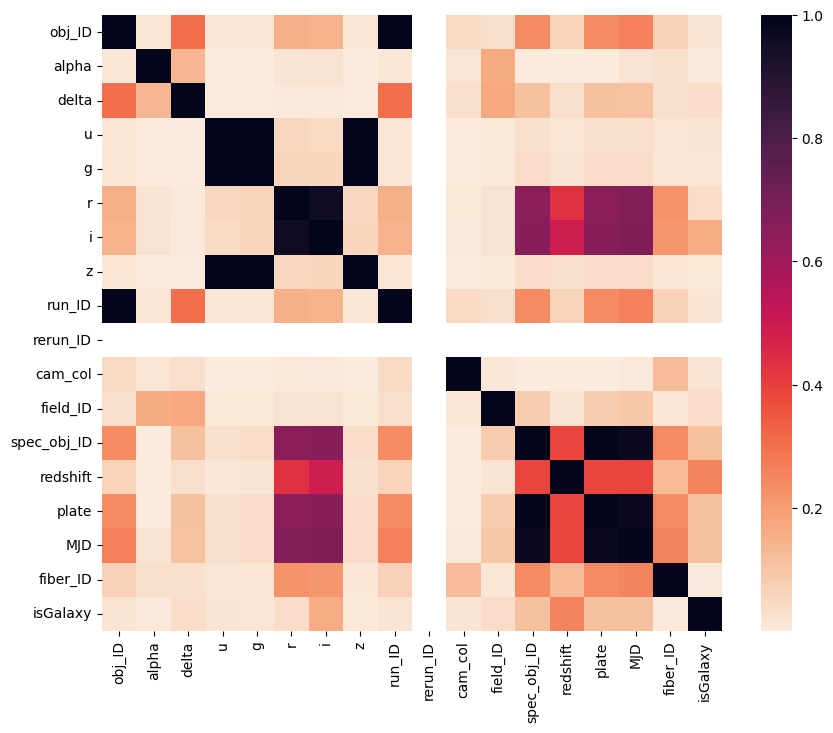

In [55]:
# ploting heatmap of the dataset...

dataNum = data.select_dtypes(include='number')
correlatedData = dataNum.corr()

fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(correlatedData.abs(),annot=False, ax=ax, cmap='rocket_r')


Performing train-dev-test split...

In [164]:
# the reason we split the data sample into 20000 is because of the fact that i run out of storage / CPU to run the entire dataset...
dataSubset = data.sample(n=20000, random_state=42)

dataSubset.isGalaxy.value_counts(normalize=True)

,proportion
isGalaxy,
1,0.593
0,0.407


In [62]:
# formatting data such that i can train-dev-test split it...

# excluding "y" column for X matrix...
tmp = dataSubset.drop(columns = ['isGalaxy'])
dataNum = tmp.select_dtypes(include='number')
X = dataNum.values

# standardizing...
avg, stdev = X.mean(), X.std()
X = (X - avg) / stdev

# normalizing...
min, max = X.min(), X.max()
X = (X - min) / (max - min)

y = dataSubset['isGalaxy'].values.reshape(-1,1)
n = X.shape[1]

if False:
  print(X.shape)
  sys.exit(0)

if False:
  # print(X)
  print(y)
  print(y.shape)
  sys.exit(0)


# excluding "y" column for X matrix...
tmp = dataSubset.drop(columns = ['isGalaxy'])
dataNum = tmp.select_dtypes(include='number')
X = dataNum.values

# standardizing...
avg, stdev = X.mean(), X.std()
X = (X - avg) / stdev

# normalizing...
min, max = X.min(), X.max()
X = (X - min) / (max - min)

y = dataSubset['isGalaxy'].values.reshape(-1,1)
n = X.shape[1]


if False:
  print(X.shape)
  sys.exit(0)

if False:
  # print(X)
  print(y)
  print(y.shape)
  sys.exit(0)


# dividing data into train and test sets...
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = X_train.T
y_train = y_train.T
X_test = X_test.T
y_test = y_test.T

if False:
  print(X_train.shape)
  print(y_train.shape)
  sys.exit(0)


PART 1 START...

In [66]:
class NeuralNetwork:
  # initialization method...
  def __init__(self, inputSize, hiddenSize, outputSize, inLearningRate, inActivation, inGradient):
    # weights...
    # this is because we do the W * X (input) as our first computation...
    # so does this mean that the X format must be of the format (inputSize, numSamples)...?
    self.W1 = np.random.randn(hiddenSize, inputSize) * .01

    # i think intuitively, it makes sense to have outputsize first since we want
    # our computation to result in something that is of the outputsize...
    self.W2 = np.random.randn(outputSize, hiddenSize) * .01

    # biases...
    self.b1 = np.zeros((hiddenSize, 1))
    self.b2 = np.zeros((outputSize, 1))

    # learning rate...
    self.learningRate = inLearningRate


    # to store the values that were calculated, since we need them for back propagation...
    self.tempCache = {
        'Z1': None,
        'A1': None,
        'Z2': None,
        'A2': None,
    }

    self.gradients = {
        'dW1': None,
        'db1': None,
        'dW2': None,
        'db2': None,
    }


    self.activationMethod = inActivation
    self.gradientMethod = inGradient


  # activation method...
  def activation(self, z):
    # implementation of different activation methods as part of my hyperparamter tuning...
    if (self.activationMethod == "tanh"):
      return np.tanh(z)

    elif (self.activationMethod == "sigmoid"):
      return 1 / (1 + np.exp(-z))

    # relu...
    else:
      if False:
        res = np.maximum(0, z)

      else:
        res = (z > 0).astype(float)

      # assert 0 <= z <= 1

      return res


  # forward propagation method...
  def forwardPropagation(self, X):
    # layer1...
    Z1 = np.dot(self.W1, X) + self.b1
    A1 = self.activation(Z1)

    # layer2...
    Z2 = np.dot(self.W2, A1) + self.b2

    # i have binary classification problem, so i am using BCE as my loss function
    # however, the problem with using tanh or relu for a final activation is that
    # having output that is not between 0 to 1 causes log to "break".
    # therefore, i strictly use sigmoid as the final output, since it will bound
    # the final classification to consistently be btwn 0 and 1, and thus, we can
    # safely use BCE
    if False:
      A2 = self.activation(Z2)

    else:
      A2 = 1 / (1 + np.exp(-Z2))
      # assert 0 <= A2 and A2 <= 1


    # storing values...
    self.tempCache['Z1'] = Z1
    self.tempCache['A1'] = A1
    self.tempCache['Z2'] = Z2
    self.tempCache['A2'] = A2

    return


  # backward propagation method...
  def backwardPropagation(self, X, y):
    # so again, X data must be of the form (inputSize, numSamples)...
    m = X.shape[1]

    dZ2 = self.tempCache['A2'] - y
    dW2 = np.dot(dZ2, self.tempCache['A1'].T) / m
    db2 = np.sum(dZ2, axis=1, keepdims=True) / m


    # difference in dZ1 depends on which activation method was used in forward propagation method...
    if (self.activationMethod == "tanh"):
      dZ1 = np.dot(self.W2.T, dZ2) * (1 - np.power(self.tempCache['A1'], 2))

    elif (self.activationMethod == "sigmoid"):
      dZ1 = np.dot(self.W2.T, dZ2) * (self.tempCache['A1'] * (1 - self.tempCache['A1']))

    else:
      reluDeriv = (self.tempCache['Z1'] > 0).astype(int)
      # dZ1 = np.dot(self.W2.T, dZ2) * (self.tempCache['A1'] * reluDeriv)
      dZ1 = np.dot(self.W2.T, dZ2) * reluDeriv


    dW1 = np.dot(dZ1, X.T) / m
    db1 = np.sum(dZ1, axis=1, keepdims=True) / m


    self.gradients['dW1'] = dW1
    self.gradients['db1'] = db1
    self.gradients['dW2'] = dW2
    self.gradients['db2'] = db2

    return


  # updates parameters based on the gradient descent calculations...
  def updateParameters(self):
    self.W1 -= self.learningRate * self.gradients['dW1']
    self.b1 -= self.learningRate * self.gradients['db1']
    self.W2 -= self.learningRate * self.gradients['dW2']
    self.b2 -= self.learningRate * self.gradients['db2']


  # cost method that calculates the loss function...
  def computeCost(self, y):
    m = y.shape[1]

    logprobs = np.multiply(np.log(self.tempCache['A2']), y) + np.multiply(np.log(1 - self.tempCache['A2']), 1 - y)
    cost = -np.sum(logprobs) / m

    cost = float(np.squeeze(cost))

    return cost


  # train method...
  def train(self, X, y, numIterations=1000, batchSize=32):
    if (self.gradientMethod == "batch"):
      for i in range(numIterations):
        self.forwardPropagation(X)

        cost = self.computeCost(y)

        self.backwardPropagation(X, y)
        self.updateParameters()

        if True and i % (numIterations // 10) == 0:
          print(f"Cost after iteration {i}: {cost}")


    elif (self.gradientMethod == "miniBatch"):
      m = X.shape[1]

      for i in range(numIterations):
        # Shuffle indices
        indices = np.arange(m)
        np.random.shuffle(indices)
        X_shuffled = X[:, indices]
        y_shuffled = y[:, indices]

        for j in range(0, m, batchSize):
          X_batch = X_shuffled[:, j:j+batchSize]
          y_batch = y_shuffled[:, j:j+batchSize]

          self.forwardPropagation(X_batch)
          self.backwardPropagation(X_batch, y_batch)
          self.updateParameters()

        cost = self.computeCost(y_batch)


        # Optional: track cost after each epoch
        if i % (numIterations // 10) == 0:
          print(f"Cost after iteration {i}: {cost}")


    # stochastic method...
    else:
      y = y.reshape(1, -1)
      m = X.shape[1]

      for i in range(numIterations):
        # Shuffle the dataset
        indices = np.arange(m)
        np.random.shuffle(indices)
        X_shuffled = X[:, indices]
        y_shuffled = y[:, indices]

        for j in range(m):
          X_sample = X_shuffled[:, j].reshape(-1, 1)
          y_sample = y_shuffled[:, j].reshape(-1, 1)

          self.forwardPropagation(X_sample)
          self.backwardPropagation(X_sample, y_sample)
          self.updateParameters()

        # Optional: compute cost on last sample for feedback
        if i % (numIterations // 10) == 0:
          cost = self.computeCost(y_sample)
          print(f"Cost after iteration {i}: {cost}")

    print(f"Final cost: {cost}")
    return


  # predict method for test set calculations...
  def predict(self, X):
    self.forwardPropagation(X)
    res = self.tempCache['A2']

    return (res > 0.5).astype(int)

hyperparameter tuning...
(independently varying factors such as hidden layer size, learning rate, activation method, gradient method...)

i will show the accuracy, precision, recall, and f1 score upon varying the following parameters at the same time:
- hidden layer size
- activation method

In [73]:
# tuning...
allHiddenSizes = [16, 64, 128]
# allLearningRates = [.0001, .001, .01]
allActivationMethods = ["tanh", "sigmoid", "relu"]
# allGradientMethods = ["batch", "miniBatch", "stochastic"]


# constant...
inputSize = X.shape[1]
outputSize = 1
learningRate = .001
gradientMethod = "batch"

allAccuracy = []
allPrecision = []
allRecall = []
allF1 = []
allyTrue = []
allyPred = []


for hidden in allHiddenSizes:
  for activation in allActivationMethods:
    # for rate in allLearningRates:
    print("\nHidden Layer Size:", hidden)
    print("Activation Method:", activation)
    # print("Learning Rate:", rate)

    activation = "relu"

    myNN = NeuralNetwork(inputSize, hidden, outputSize, learningRate, activation, gradientMethod)
    myNN.train(X_train, y_train, numIterations=1000)

# myNN = NeuralNetwork(inputSize, hiddenSize, outputSize, learningRate, activation, gradient)
# myNN.train(X_train, y_train, numIterations=1000)


    y_pred = myNN.predict(X_test)

    # for compatibility...
    y_true = y_test.flatten()
    y_pred_flat = y_pred.flatten()

    # print("Accuracy:", accuracy_score(y_true, y_pred_flat))
    # print("Precision:", precision_score(y_true, y_pred_flat))
    # print("Recall:", recall_score(y_true, y_pred_flat))
    # print("F1 Score:", f1_score(y_true, y_pred_flat))


    allAccuracy.append(accuracy_score(y_true, y_pred_flat))
    allPrecision.append(precision_score(y_true, y_pred_flat))
    allRecall.append(recall_score(y_true, y_pred_flat))
    allF1.append(f1_score(y_true, y_pred_flat))

    # print("\nHidden Layer Size:", hidden)
    # print("Activation Method:", activation)
    # print("Gradient Method:", gradient)


    allyTrue.append(y_true)
    allyPred.append(y_pred_flat)

    # print("\nConfusion Matrix:")
    # print(confusion_matrix(y_true, y_pred_flat))
    # print("\nClassification Report:")
    # print(classification_report(y_true, y_pred_flat))


      # TN FP
      # FN TP

    # break
  # break





Hidden Layer Size: 16
Activation Method: tanh
Cost after iteration 0: 0.6909166777426963
Cost after iteration 100: 0.686523411195702
Cost after iteration 200: 0.6836641869938426
Cost after iteration 300: 0.6813349741799366
Cost after iteration 400: 0.6796209044815081
Cost after iteration 500: 0.6783947223314972
Cost after iteration 600: 0.6775956363542704
Cost after iteration 700: 0.6771111872589861
Cost after iteration 800: 0.676760244214793
Cost after iteration 900: 0.6765460077698756
Final cost: 0.6764024694640605

Hidden Layer Size: 16
Activation Method: sigmoid
Cost after iteration 0: 0.6932527354327555
Cost after iteration 100: 0.6885670444651468
Cost after iteration 200: 0.6850457040237935
Cost after iteration 300: 0.6824708667302919
Cost after iteration 400: 0.6805592342741457
Cost after iteration 500: 0.6791349680897528
Cost after iteration 600: 0.6780785609172983
Cost after iteration 700: 0.677287300655723
Cost after iteration 800: 0.6766939954143104
Cost after iteration 900

In [77]:
# printing all results...
index = 0
for hidden in allHiddenSizes:
  for activation in allActivationMethods:
    # for gradient in allGradientMethods:
    print("Hidden Layer Size:", hidden)
    print("Activation Method:", activation)
    # print("Gradient Method:", gradient)

    print("\nAccuracy:", allAccuracy[index])
    print("Precision:", allPrecision[index])
    print("Recall:", allRecall[index])
    print("F1 Score:", allF1[index])


    print("\nConfusion Matrix:")
    print(confusion_matrix(allyTrue[index], allyPred[index]))
    print("\nClassification Report:")
    print(classification_report(allyTrue[index], allyPred[index]))


    print("-" * 100)
    print("\n\n")

    index += 1

Hidden Layer Size: 16
Activation Method: tanh

Accuracy: 0.586
Precision: 0.586
Recall: 1.0
F1 Score: 0.7389659520807061

Confusion Matrix:
[[   0 1656]
 [   0 2344]]

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1656
           1       0.59      1.00      0.74      2344

    accuracy                           0.59      4000
   macro avg       0.29      0.50      0.37      4000
weighted avg       0.34      0.59      0.43      4000

----------------------------------------------------------------------------------------------------



Hidden Layer Size: 16
Activation Method: sigmoid

Accuracy: 0.586
Precision: 0.586
Recall: 1.0
F1 Score: 0.7389659520807061

Confusion Matrix:
[[   0 1656]
 [   0 2344]]

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1656
           1       0.59      1.00      0.74      2344

    accuracy        

Discussion:

The tecnique used to help with runtime was mainly just randomly selecting a smaller population of my data (from 100000 entries to 20000).


For our hypertuning, varying hidden layer did not seem to have an effect on the results.

However, there was certainly a big notice in both runtime and accuracy (in terms of loss) for varying gradient. Batch gradient had the highest loss, while not having significantly long runtime. On the other hand, stochastic did not converge as well as the fact that it took severely more time to execute, which is why I had to lower the number of iterations. Lastly, minibatch gradient seemed to do ok in runtime. It is worth noting that the only gradient to converge was batch... Perhaps this is due to the sensitivity of hyper parameter tuning, as there are many things that can be tuned.

Lastly, upon independently varying activation functions, it was observed that both relu and and tanh seemed to display similar performance. However, sigmoid was generally the most accurate (least amount of final loss).

TASK2 START...

While my dataset is tabular, it can be considered complex, given the total number of data observations (100000) and data features that it has (18).

For the Deep Learning Framework that I chose to implement, I used PyTorch.
The resources I utilized for the completion of this part 2 are the following:
- https://pytorch.org/tutorials/beginner/basics/buildmodel_tutorial.html
- https://docs.pytorch.org/docs/stable/optim.html
- https://blog.paperspace.com/why-use-pytorch-deep-learning-framework/

I also used ChatGPT to help me with debugging and also getting familiar with the PyTorch built-in methods.


The main motivation for using PyTorch is given how beginner friendly it is, both in syntax and is considered easier to learn compared to other deep learning frameworks, such as TensorFlow.


To implement forward propagation, I needed to learn how to build custom model layers using torch.nn.Linear and how to apply activation functions like ReLU and Sigmoid using torch.nn.functional. Additionally, for backward propagation, I looked into different optimizers for different verions of gradient descent. This was necessary in my hyperparameter tuning. Finally, I had to understand how to use DataLoader for batching and torch.Tensor operations for vectorized computations.

In [152]:
# formatting data such that i can train-dev-test split it...

# excluding "y" column for X matrix...
tmp = data.drop(columns = ['isGalaxy'])
dataNum = tmp.select_dtypes(include='number')
X = dataNum.values

# getting rid of features that don't have very high variation...
# these features are effectively "useless" for the model to learn from
selector = VarianceThreshold(threshold=1e-5)
X = selector.fit_transform(X)

# print(X.std(axis=0))
# print(X_reduced.std(axis=0))

# sys.exit(1)

# standardizing...
avg, stdev = X.mean(), X.std()
X = (X - avg) / stdev

# normalizing...
min, max = X.min(), X.max()
X = (X - min) / (max - min)

y = data['isGalaxy'].values.reshape(-1,1)
n = X.shape[1]

if False:
  print(X.shape)
  sys.exit(0)

if False:
  # print(X)
  print(y)
  print(y.shape)
  sys.exit(0)

# dividing data into train and test sets...
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# X_train = X_train.T
# y_train = y_train.T

if False:
  print(X_train.shape)
  print(y_train.shape)
  sys.exit(0)


In [153]:
# converting numpy arrays to pytorch tensors...
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

# creating datasets...
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

# creating loaders...
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64)

In [154]:
# initializing the NN itself...
class nnTorch(nn.Module):
  def __init__(self, input_size, hidden_size, output_size):
    super(nnTorch, self).__init__()

    self.fc1 = nn.Linear(input_size, hidden_size)

    # choice of nonlinear activation function is RELU...
    self.relu = nn.ReLU()
    self.fc2 = nn.Linear(hidden_size, output_size)
    self.sigmoid = nn.Sigmoid()

    # nn.init.xavier_uniform_(self.fc1.weight)
    # nn.init.zeros_(self.fc1.bias)
    # nn.init.xavier_uniform_(self.fc2.weight)
    # nn.init.zeros_(self.fc2.bias)

  def forward(self, x):
    # input layer --> hidden layer
    out = self.fc1(x)

    # apply nonlinear activation (hidden layer --> hidden layer)
    out = self.relu(out)

    # hidden layer --> output layer
    out = self.fc2(out)

    # binary classification, so we use sigmoid for final nonlinear activation
    # sigmoid specifically clamps the output btwn 0 and 1
    out = self.sigmoid(out)
    return out

hyperparameter tuning...
(independently varying factors such as hidden layer size, learning rate, activation method, optimizer...)

i will show the accuracy, precision, recall, and f1 score upon varying the following 2 parameters:
- hidden layer size
- optimizer for gradient descent

In [155]:
# tuning...
allHiddenSizes = [16, 64, 128]
# allLearningRates = [.0001, .001, .01]
allOptimizers = ["Adam", "SGD", "RMS"]


# constants...
input_size = X_train.shape[1]
output_size = 1
num_epochs = 20
learningRate = .001

# we use BCELoss because this is binary classification problem...
criterion = nn.BCELoss()


allAccuracy = []
allPrecision = []
allRecall = []
allF1 = []
allyTrue = []
allyPred = []


for hidden in allHiddenSizes:
  # for rate in allLearningRates:
  for optimizerName in allOptimizers:
    model = nnTorch(input_size, hidden, output_size)

    if (optimizerName == "Adam"):
      optimizer = torch.optim.Adam(model.parameters(), lr=learningRate)
    elif (optimizerName == "SGD"):
      optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)
    else:
      optimizer = torch.optim.RMSprop(model.parameters(), lr=learningRate)

    print("\nHidden Layer Size:", hidden)
    print("Learning Rate:", learningRate)
    print("Optimizer:", optimizerName)

    model = nnTorch(input_size, hidden, output_size)


    for epoch in range(num_epochs):
      for batch_X, batch_y in train_loader:
        # batch_y = torch.argmax(batch_y, dim=1).unsqueeze(1).float()
        batch_y = batch_y.view(-1, 1).float()


        if False:
          print(batch_y)
          sys.exit(0)

        # forward...
        outputs = model.forward(batch_X)
        # print("Predictions:", outputs.min().item(), outputs.max().item())

        # print(batch_y.view(-1,1).float()[:5])
        # sys.exit(1)

        # print("Batch Y stats:", batch_y.min().item(), batch_y.max().item())

        loss = criterion(outputs, batch_y.view(-1, 1).float())

        if False:
          print(outputs.shape, batch_y.view(-1, 1).shape)
          sys.exit(0)

        # backward...
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # for name, param in model.named_parameters():
        #   if param.grad is not None:
        #     print(f"{name} grad mean: {param.grad.mean().item():.6f}")


        # if (loss < epsilon):
        #   break

      print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}")

      model.eval()
      with torch.no_grad():
        y_pred = model(X_test_tensor)

      y_pred = (y_pred > 0.5).float()


      # print("Accuracy:", accuracy_score(y_test, y_pred))
      # print("Precision:", precision_score(y_test, y_pred))
      # print("Recall:", recall_score(y_test, y_pred))
      # print("F1:", f1_score(y_test, y_pred))

      # # confusion matrix and other evaluation metrics...
      # print(confusion_matrix(y_test, y_pred))
      # print(classification_report(y_test, y_pred))

      allAccuracy.append(accuracy_score(y_true, y_pred_flat))
      allPrecision.append(precision_score(y_true, y_pred_flat))
      allRecall.append(recall_score(y_true, y_pred_flat))
      allF1.append(f1_score(y_true, y_pred_flat))

      allyTrue.append(y_true)
      allyPred.append(y_pred_flat)


Hidden Layer Size: 16
Learning Rate: 0.001
Optimizer: Adam
Epoch 1/20, Loss: 0.6904
Epoch 2/20, Loss: 0.6931
Epoch 3/20, Loss: 0.6920
Epoch 4/20, Loss: 0.6844
Epoch 5/20, Loss: 0.6841
Epoch 6/20, Loss: 0.6913
Epoch 7/20, Loss: 0.6840
Epoch 8/20, Loss: 0.6950
Epoch 9/20, Loss: 0.6925
Epoch 10/20, Loss: 0.6833
Epoch 11/20, Loss: 0.6881
Epoch 12/20, Loss: 0.6822
Epoch 13/20, Loss: 0.6959
Epoch 14/20, Loss: 0.6886
Epoch 15/20, Loss: 0.6923
Epoch 16/20, Loss: 0.6890
Epoch 17/20, Loss: 0.6826
Epoch 18/20, Loss: 0.6950
Epoch 19/20, Loss: 0.6875
Epoch 20/20, Loss: 0.6963

Hidden Layer Size: 16
Learning Rate: 0.001
Optimizer: SGD
Epoch 1/20, Loss: 0.7075
Epoch 2/20, Loss: 0.7106
Epoch 3/20, Loss: 0.7009
Epoch 4/20, Loss: 0.7128
Epoch 5/20, Loss: 0.7053
Epoch 6/20, Loss: 0.7055
Epoch 7/20, Loss: 0.7149
Epoch 8/20, Loss: 0.7078
Epoch 9/20, Loss: 0.7043
Epoch 10/20, Loss: 0.7046
Epoch 11/20, Loss: 0.7118
Epoch 12/20, Loss: 0.7016
Epoch 13/20, Loss: 0.6983
Epoch 14/20, Loss: 0.6980
Epoch 15/20, Lo

In [156]:
# printing all results...
index = 0
for hidden in allHiddenSizes:
  for opt in allOptimizers:
    # for gradient in allGradientMethods:
    print("Hidden Layer Size:", hidden)
    print("Optimizer:", opt)
    # print("Gradient Method:", gradient)

    print("\nAccuracy:", allAccuracy[index])
    print("Precision:", allPrecision[index])
    print("Recall:", allRecall[index])
    print("F1 Score:", allF1[index])


    print("\nConfusion Matrix:")
    print(confusion_matrix(allyTrue[index], allyPred[index]))
    print("\nClassification Report:")
    print(classification_report(allyTrue[index], allyPred[index]))


    print("-" * 100)
    print("\n\n")

    index += 1

Hidden Layer Size: 16
Optimizer: Adam

Accuracy: 0.586
Precision: 0.586
Recall: 1.0
F1 Score: 0.7389659520807061

Confusion Matrix:
[[   0 1656]
 [   0 2344]]

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1656
           1       0.59      1.00      0.74      2344

    accuracy                           0.59      4000
   macro avg       0.29      0.50      0.37      4000
weighted avg       0.34      0.59      0.43      4000

----------------------------------------------------------------------------------------------------



Hidden Layer Size: 16
Optimizer: SGD

Accuracy: 0.586
Precision: 0.586
Recall: 1.0
F1 Score: 0.7389659520807061

Confusion Matrix:
[[   0 1656]
 [   0 2344]]

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1656
           1       0.59      1.00      0.74      2344

    accuracy                           0

regularization...

this is done by adding a weight decay to the optimizer...

In [157]:
# tuning...
allHiddenSizes = [16, 64, 128]
# allLearningRates = [.0001, .001, .01]
allOptimizers = ["Adam", "SGD", "RMS"]


# constants...
input_size = X_train.shape[1]
output_size = 1
num_epochs = 20
learningRate = .001

# we use BCELoss because this is binary classification problem...
criterion = nn.BCELoss()


allAccuracy = []
allPrecision = []
allRecall = []
allF1 = []
allyTrue = []
allyPred = []


for hidden in allHiddenSizes:
  # for rate in allLearningRates:
  for optimizerName in allOptimizers:
    model = nnTorch(input_size, hidden, output_size)

    if (optimizerName == "Adam"):
      optimizer = torch.optim.Adam(model.parameters(), lr=learningRate, weight_decay=1e-4)
    elif (optimizerName == "SGD"):
      optimizer = torch.optim.SGD(model.parameters(), lr=learningRate, weight_decay=1e-4)
    else:
      optimizer = torch.optim.RMSprop(model.parameters(), lr=learningRate, weight_decay=1e-4)

    print("\nHidden Layer Size:", hidden)
    print("Learning Rate:", learningRate)
    print("Optimizer:", optimizerName)

    model = nnTorch(input_size, hidden, output_size)


    for epoch in range(num_epochs):
      for batch_X, batch_y in train_loader:
        # batch_y = torch.argmax(batch_y, dim=1).unsqueeze(1).float()
        batch_y = batch_y.view(-1, 1).float()


        if False:
          print(batch_y)
          sys.exit(0)

        # forward...
        outputs = model.forward(batch_X)
        # print("Predictions:", outputs.min().item(), outputs.max().item())

        # print(batch_y.view(-1,1).float()[:5])
        # sys.exit(1)

        # print("Batch Y stats:", batch_y.min().item(), batch_y.max().item())

        loss = criterion(outputs, batch_y.view(-1, 1).float())

        if False:
          print(outputs.shape, batch_y.view(-1, 1).shape)
          sys.exit(0)

        # backward...
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # for name, param in model.named_parameters():
        #   if param.grad is not None:
        #     print(f"{name} grad mean: {param.grad.mean().item():.6f}")


        # if (loss < epsilon):
        #   break

      print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}")

      model.eval()
      with torch.no_grad():
        y_pred = model(X_test_tensor)

      y_pred = (y_pred > 0.5).float()


      # print("Accuracy:", accuracy_score(y_test, y_pred))
      # print("Precision:", precision_score(y_test, y_pred))
      # print("Recall:", recall_score(y_test, y_pred))
      # print("F1:", f1_score(y_test, y_pred))

      # # confusion matrix and other evaluation metrics...
      # print(confusion_matrix(y_test, y_pred))
      # print(classification_report(y_test, y_pred))

      allAccuracy.append(accuracy_score(y_true, y_pred_flat))
      allPrecision.append(precision_score(y_true, y_pred_flat))
      allRecall.append(recall_score(y_true, y_pred_flat))
      allF1.append(f1_score(y_true, y_pred_flat))

      allyTrue.append(y_true)
      allyPred.append(y_pred_flat)


Hidden Layer Size: 16
Learning Rate: 0.001
Optimizer: Adam
Epoch 1/20, Loss: 0.7539
Epoch 2/20, Loss: 0.7357
Epoch 3/20, Loss: 0.7700
Epoch 4/20, Loss: 0.7313
Epoch 5/20, Loss: 0.6971
Epoch 6/20, Loss: 0.7477
Epoch 7/20, Loss: 0.7204
Epoch 8/20, Loss: 0.7479
Epoch 9/20, Loss: 0.7244
Epoch 10/20, Loss: 0.7693
Epoch 11/20, Loss: 0.7476
Epoch 12/20, Loss: 0.7380
Epoch 13/20, Loss: 0.7416
Epoch 14/20, Loss: 0.7418
Epoch 15/20, Loss: 0.7596
Epoch 16/20, Loss: 0.7144
Epoch 17/20, Loss: 0.7201
Epoch 18/20, Loss: 0.7863
Epoch 19/20, Loss: 0.7532
Epoch 20/20, Loss: 0.7245

Hidden Layer Size: 16
Learning Rate: 0.001
Optimizer: SGD
Epoch 1/20, Loss: 0.6942
Epoch 2/20, Loss: 0.6847
Epoch 3/20, Loss: 0.6612
Epoch 4/20, Loss: 0.6874
Epoch 5/20, Loss: 0.6613
Epoch 6/20, Loss: 0.6866
Epoch 7/20, Loss: 0.6739
Epoch 8/20, Loss: 0.6733
Epoch 9/20, Loss: 0.6976
Epoch 10/20, Loss: 0.6873
Epoch 11/20, Loss: 0.6789
Epoch 12/20, Loss: 0.6919
Epoch 13/20, Loss: 0.6533
Epoch 14/20, Loss: 0.6934
Epoch 15/20, Lo

In [158]:
# printing all results...
index = 0
for hidden in allHiddenSizes:
  for opt in allOptimizers:
    # for gradient in allGradientMethods:
    print("Hidden Layer Size:", hidden)
    print("Optimizer:", opt)
    # print("Gradient Method:", gradient)

    print("\nAccuracy:", allAccuracy[index])
    print("Precision:", allPrecision[index])
    print("Recall:", allRecall[index])
    print("F1 Score:", allF1[index])


    print("\nConfusion Matrix:")
    print(confusion_matrix(allyTrue[index], allyPred[index]))
    print("\nClassification Report:")
    print(classification_report(allyTrue[index], allyPred[index]))


    print("-" * 100)
    print("\n\n")

    index += 1

Hidden Layer Size: 16
Optimizer: Adam

Accuracy: 0.586
Precision: 0.586
Recall: 1.0
F1 Score: 0.7389659520807061

Confusion Matrix:
[[   0 1656]
 [   0 2344]]

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1656
           1       0.59      1.00      0.74      2344

    accuracy                           0.59      4000
   macro avg       0.29      0.50      0.37      4000
weighted avg       0.34      0.59      0.43      4000

----------------------------------------------------------------------------------------------------



Hidden Layer Size: 16
Optimizer: SGD

Accuracy: 0.586
Precision: 0.586
Recall: 1.0
F1 Score: 0.7389659520807061

Confusion Matrix:
[[   0 1656]
 [   0 2344]]

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1656
           1       0.59      1.00      0.74      2344

    accuracy                           0

no normalization / standardization of input...

In [159]:
# formatting data such that i can train-dev-test split it...

# excluding "y" column for X matrix...
tmp = data.drop(columns = ['isGalaxy'])
dataNum = tmp.select_dtypes(include='number')
X = dataNum.values


y = data['isGalaxy'].values.reshape(-1,1)
n = X.shape[1]


# dividing data into train and test sets...
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# X_train = X_train.T
# y_train = y_train.T

if False:
  print(X_train.shape)
  print(y_train.shape)
  sys.exit(0)


In [160]:
# converting numpy arrays to pytorch tensors...
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

# creating datasets...
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

# creating loaders...
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64)

In [161]:
# tuning...
allHiddenSizes = [16, 64, 128]
# allLearningRates = [.0001, .001, .01]
allOptimizers = ["Adam", "SGD", "RMS"]


# constants...
input_size = X_train.shape[1]
output_size = 1
num_epochs = 20
learningRate = .001

# we use BCELoss because this is binary classification problem...
criterion = nn.BCELoss()


allAccuracy = []
allPrecision = []
allRecall = []
allF1 = []
allyTrue = []
allyPred = []


for hidden in allHiddenSizes:
  # for rate in allLearningRates:
  for optimizerName in allOptimizers:
    model = nnTorch(input_size, hidden, output_size)

    if (optimizerName == "Adam"):
      optimizer = torch.optim.Adam(model.parameters(), lr=learningRate)
    elif (optimizerName == "SGD"):
      optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)
    else:
      optimizer = torch.optim.RMSprop(model.parameters(), lr=learningRate)

    print("\nHidden Layer Size:", hidden)
    print("Learning Rate:", learningRate)
    print("Optimizer:", optimizerName)

    model = nnTorch(input_size, hidden, output_size)


    for epoch in range(num_epochs):
      for batch_X, batch_y in train_loader:
        # batch_y = torch.argmax(batch_y, dim=1).unsqueeze(1).float()
        batch_y = batch_y.view(-1, 1).float()


        if False:
          print(batch_y)
          sys.exit(0)

        # forward...
        outputs = model.forward(batch_X)
        # print("Predictions:", outputs.min().item(), outputs.max().item())

        # print(batch_y.view(-1,1).float()[:5])
        # sys.exit(1)

        # print("Batch Y stats:", batch_y.min().item(), batch_y.max().item())

        loss = criterion(outputs, batch_y.view(-1, 1).float())

        if False:
          print(outputs.shape, batch_y.view(-1, 1).shape)
          sys.exit(0)

        # backward...
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # for name, param in model.named_parameters():
        #   if param.grad is not None:
        #     print(f"{name} grad mean: {param.grad.mean().item():.6f}")


        # if (loss < epsilon):
        #   break

      print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}")

      model.eval()
      with torch.no_grad():
        y_pred = model(X_test_tensor)

      y_pred = (y_pred > 0.5).float()


      # print("Accuracy:", accuracy_score(y_test, y_pred))
      # print("Precision:", precision_score(y_test, y_pred))
      # print("Recall:", recall_score(y_test, y_pred))
      # print("F1:", f1_score(y_test, y_pred))

      # # confusion matrix and other evaluation metrics...
      # print(confusion_matrix(y_test, y_pred))
      # print(classification_report(y_test, y_pred))

      allAccuracy.append(accuracy_score(y_true, y_pred_flat))
      allPrecision.append(precision_score(y_true, y_pred_flat))
      allRecall.append(recall_score(y_true, y_pred_flat))
      allF1.append(f1_score(y_true, y_pred_flat))

      allyTrue.append(y_true)
      allyPred.append(y_pred_flat)


Hidden Layer Size: 16
Learning Rate: 0.001
Optimizer: Adam
Epoch 1/20, Loss: 37.5000
Epoch 2/20, Loss: 45.3125
Epoch 3/20, Loss: 25.0000
Epoch 4/20, Loss: 42.1875
Epoch 5/20, Loss: 42.1875
Epoch 6/20, Loss: 21.8750
Epoch 7/20, Loss: 42.1875
Epoch 8/20, Loss: 43.7500
Epoch 9/20, Loss: 42.1875
Epoch 10/20, Loss: 45.3125
Epoch 11/20, Loss: 50.0000
Epoch 12/20, Loss: 39.0625
Epoch 13/20, Loss: 43.7500
Epoch 14/20, Loss: 42.1875
Epoch 15/20, Loss: 43.7500
Epoch 16/20, Loss: 35.9375
Epoch 17/20, Loss: 43.7500
Epoch 18/20, Loss: 25.0000
Epoch 19/20, Loss: 40.6250
Epoch 20/20, Loss: 35.9375

Hidden Layer Size: 16
Learning Rate: 0.001
Optimizer: SGD
Epoch 1/20, Loss: 51.5625
Epoch 2/20, Loss: 46.8750
Epoch 3/20, Loss: 60.9375
Epoch 4/20, Loss: 60.9375
Epoch 5/20, Loss: 51.5625
Epoch 6/20, Loss: 59.3750
Epoch 7/20, Loss: 40.6250
Epoch 8/20, Loss: 56.2500
Epoch 9/20, Loss: 59.3750
Epoch 10/20, Loss: 53.1250
Epoch 11/20, Loss: 51.5625
Epoch 12/20, Loss: 62.5000
Epoch 13/20, Loss: 64.0625
Epoch 14

In [162]:
# printing all results...
index = 0
for hidden in allHiddenSizes:
  for opt in allOptimizers:
    # for gradient in allGradientMethods:
    print("Hidden Layer Size:", hidden)
    print("Optimizer:", opt)
    # print("Gradient Method:", gradient)

    print("\nAccuracy:", allAccuracy[index])
    print("Precision:", allPrecision[index])
    print("Recall:", allRecall[index])
    print("F1 Score:", allF1[index])


    print("\nConfusion Matrix:")
    print(confusion_matrix(allyTrue[index], allyPred[index]))
    print("\nClassification Report:")
    print(classification_report(allyTrue[index], allyPred[index]))


    print("-" * 100)
    print("\n\n")

    index += 1

Hidden Layer Size: 16
Optimizer: Adam

Accuracy: 0.586
Precision: 0.586
Recall: 1.0
F1 Score: 0.7389659520807061

Confusion Matrix:
[[   0 1656]
 [   0 2344]]

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1656
           1       0.59      1.00      0.74      2344

    accuracy                           0.59      4000
   macro avg       0.29      0.50      0.37      4000
weighted avg       0.34      0.59      0.43      4000

----------------------------------------------------------------------------------------------------



Hidden Layer Size: 16
Optimizer: SGD

Accuracy: 0.586
Precision: 0.586
Recall: 1.0
F1 Score: 0.7389659520807061

Confusion Matrix:
[[   0 1656]
 [   0 2344]]

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1656
           1       0.59      1.00      0.74      2344

    accuracy                           0

TASK3 START...

In [163]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train.ravel())
print("Train acc:", model.score(X_train, y_train))
print("Test acc:", model.score(X_test, y_test))

Train acc: 0.6057125
Test acc: 0.6078


For my hyperparameter tuning, I varied different optimizers such as RMSProp, Adam, and SGD. Concurrently, I varied the hidden layer size. By varying multiple hyperparameters at once, I was hoping to observe the highest accurate parameters for the model. However, all the results were the same.

Even with incorporating regularization as well as not standardizing and normalizing the data, all the results were the same.

I also noticed that the model did not seem to be learning on the data, no matter what I did to the data (standardization / normalization vs not standardization / normalization, getting rid of features that have barely any variation in them, as well as typical EDA and cleaning the data).

Having checked all my work, I am inclined to believe that the problem lies with the data itself and not my model. I have a couple of reasons why I believe this:
- my NN from scratch exhibits the exact same behavior, in which it only predicts all 1's (and in fact, the accuracy, precision scores, etc are the exact same)
- using a prebuilt logistic regression above, we observe roughly the exact same accuracy of my model, both built from scratch and prebuilt.

While the data labels themselves don't appear too unbalanced, with ~60% being 1's and the rest being 0's, my model from scratch, my prebuilt model, and the prebuild logistic regression model all exihibit the same accuracy of ~60%. This suggests that the problem lies within the data itself, such as having features that are not correlated at all with each other.
